In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from scipy.linalg import eigh
import random
from sklearn.metrics import silhouette_score as ss
from sklearn.metrics import adjusted_rand_score as ars
from sklearn.cluster import KMeans
from itertools import combinations as cb
from sklearn.cluster import SpectralClustering

In [2]:
random.seed(42)
rand_num = random.sample(range(0, 101), 25)
# rand_num = random.sample(range(100, 201), 25)
rand_num = sorted(rand_num)

In [3]:
def get_blobs(n_samples=200, centers=4, random_state=42):
    X, Y = datasets.make_blobs(n_samples=n_samples, centers=centers, random_state=random_state)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', s=30, alpha=0.8)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    
def get_blobs(n_samples=200, centers=4, random_state=42):
    X, Y = datasets.make_blobs(n_samples=n_samples, centers=centers, random_state=random_state)
    return X, Y

In [4]:
def core_routine(X, Y, num_clusters=4):
    # matrices
    A = np.exp(-pairwise_distances(X, metric='euclidean'))
    D = np.diag(np.sum(A, axis=1))
    L = D - A
    L = L + np.eye(L.shape[0]) * 1e-6
    val, vec = eigh(normalize(L))
    return vec[:num_clusters]

In [5]:
def le_visualization(vec, Y):
    fig, axs = plt.subplots(2, 3, figsize=(15, 5))
    axs = axs.flatten() 
    axs[0].scatter(np.zeros(len(vec[1])), vec[1], c=Y, cmap='viridis', s=30, alpha=0.8)
    axs[1].scatter(np.zeros(len(vec[2])), vec[2], c=Y, cmap='viridis', s=30, alpha=0.8)
    axs[2].scatter(np.zeros(len(vec[3])), vec[3], c=Y, cmap='viridis', s=30, alpha=0.8)
    axs[3].scatter(vec[1], vec[2], c=Y, cmap='viridis', s=30, alpha=0.8)
    axs[4].scatter(vec[1], vec[3], c=Y, cmap='viridis', s=30, alpha=0.8)
    axs[5].scatter(vec[2], vec[3], c=Y, cmap='viridis', s=30, alpha=0.8)
    plt.show()

In [6]:
def get_score(X, Y, method): # ss or ard
    km = KMeans(n_clusters=4, random_state=42).fit(X)
    label_predicted = km.fit_predict(X)
    if method=='ss':
        return ss(X, label_predicted)
    elif method=='ars':
        return ars(Y, label_predicted)

def get_best_le(vec, Y, method):
    elem = range(len(vec))
    all_cb = list(cb(elem,2))
    temp_score = []
    for pair in all_cb:
        temp_data = np.stack((vec[pair[0]], vec[pair[1]]), axis=1)
        temp_score.append(get_score(X=temp_data, Y=Y, method=method))
    best_idx = np.argmax(temp_score)
    return all_cb[best_idx], np.round(temp_score[best_idx],3)

def get_best_plot(rn, vec, Y, best_pair, best_score, method, ax):
    i = best_pair[0]
    j = best_pair[1]
    ax.scatter(vec[i], vec[j], c=Y, cmap='viridis', s=30, alpha=0.8)
    ax.set_title(f'rs {rn} with {method} score {best_score}')
    # ax.set_xlabel(f'featrue {i}')
    # ax.set_ylabel(f'featrue {j}')
    ax.set_xticks([])
    ax.set_yticks([])
    # fig.savefig(f'rd_plots/random_state_{rn}.png')
    # plt.show()

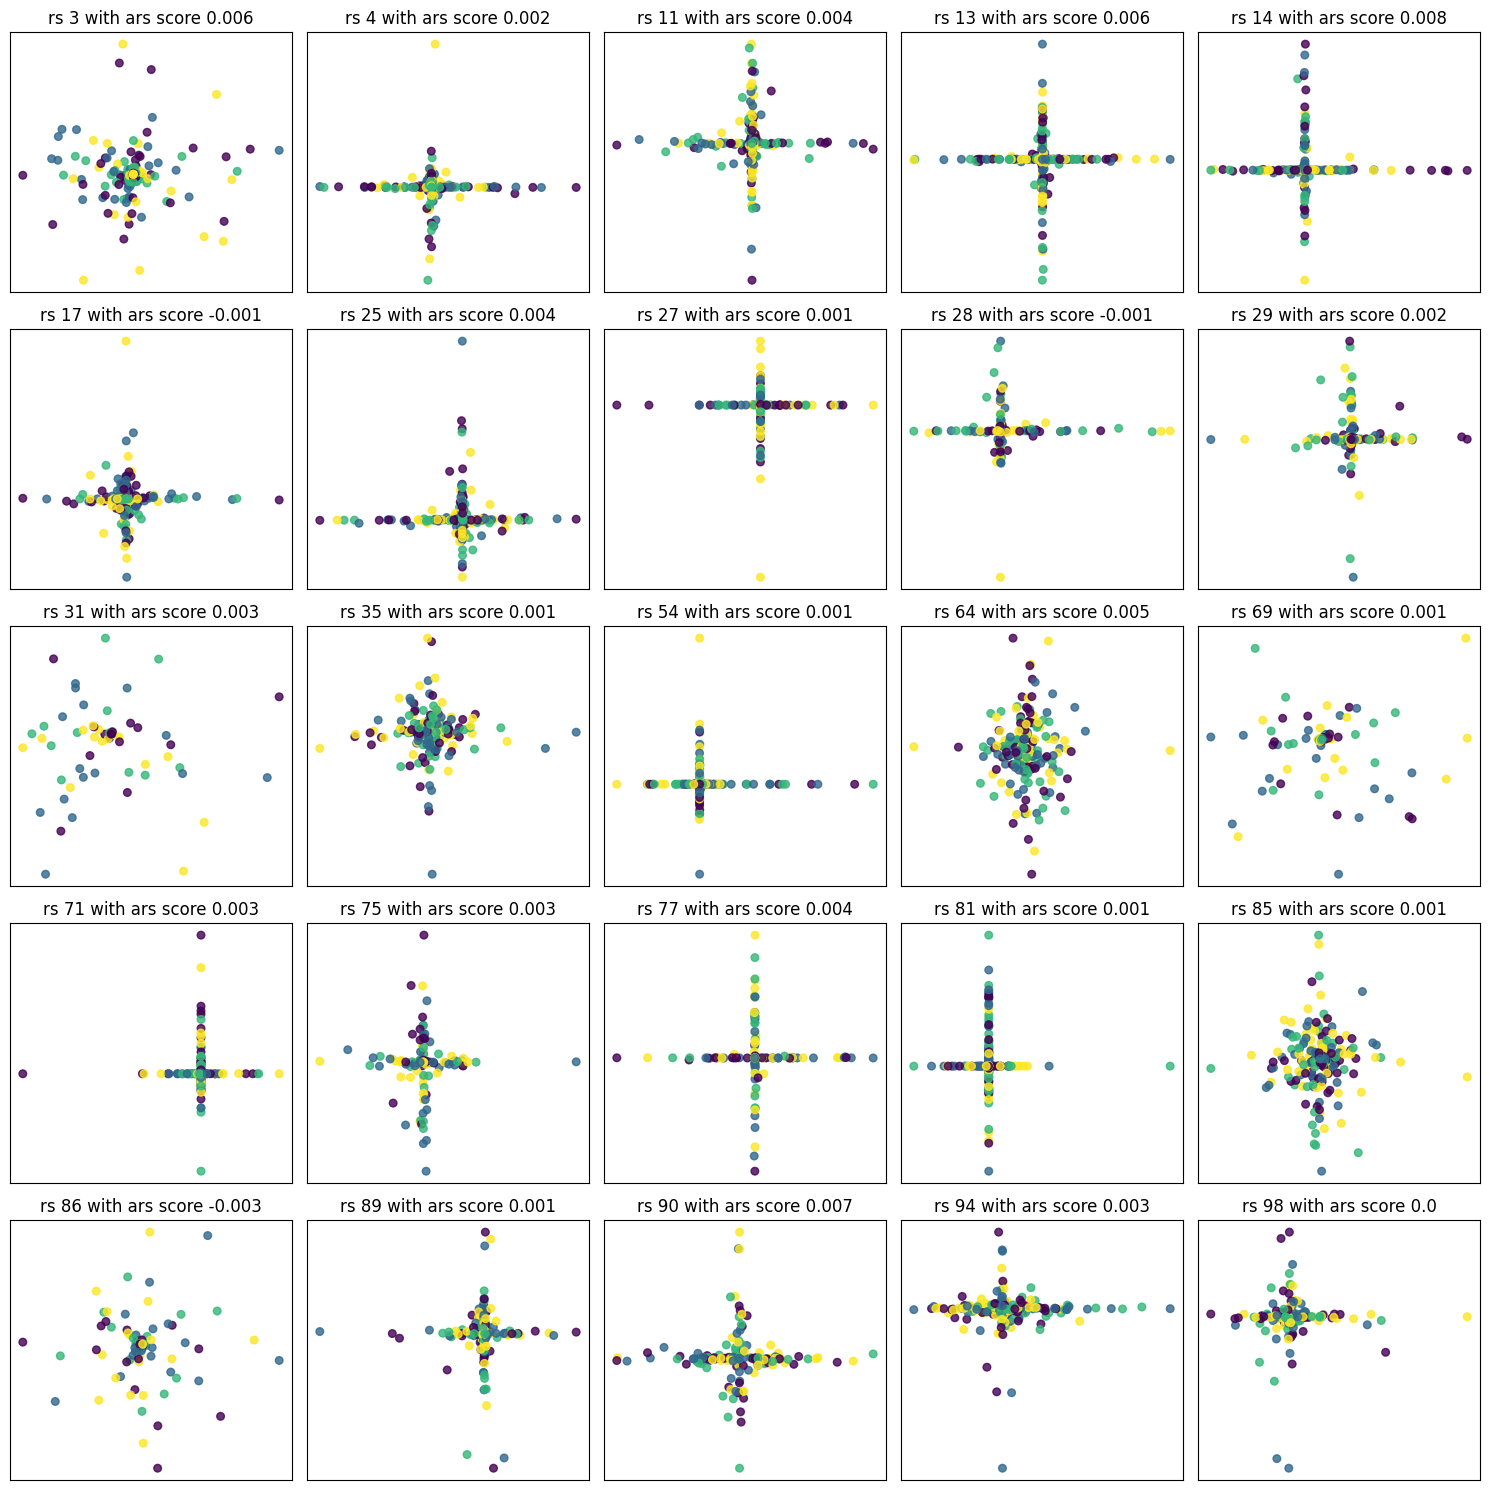

In [7]:
score_list = []

fig, axes = plt.subplots(5, 5, figsize=(15, 15))  # 5x5 grid, adjust size as needed
axes = axes.flatten() 

for i, rn in enumerate(rand_num):
    # generate dataset
    X, Y = get_blobs(random_state=rn)
    # core routine to embed data on LE
    vec = core_routine(X, Y)
    # get the best indices and corresponding score
    method = 'ars' # or ss
    best_pair, best_score = get_best_le(vec, Y, method)
    score_list.append(best_score)
    # plot
    get_best_plot(rn, vec, Y, best_pair, best_score, method, ax=axes[i])

plt.tight_layout()
plt.show()

In [8]:
fig.savefig('rd_plots/evaluation_le_conventional_normal.png')

In [27]:
score_df = pd.DataFrame([rand_num, score_list]).T
score_df.columns = ['random_state','score']
score_df['random_state'] = score_df['random_state'].astype('int')
score_df

,random_state,score
0,3,0.006
1,4,0.002
2,11,0.004
3,13,0.006
4,14,0.008
5,17,-0.001
6,25,0.004
7,27,0.001
8,28,-0.001
9,29,0.002


In [28]:
score_df.to_csv('rd_plots/score_table_conventional.csv', index=False)